# Task # 2 - To Explore Supervised Machine Learning
# SHIVAM TIWARI


# SIMPLE LINEAR REGRESSION

In [1]:
# importing libraries
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns

In [2]:
# reading data 
data="http://bit.ly/w-data"
df=pd.read_csv(data)
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [3]:
df.head

<bound method NDFrame.head of     Hours  Scores
0     2.5      21
1     5.1      47
2     3.2      27
3     8.5      75
4     3.5      30
5     1.5      20
6     9.2      88
7     5.5      60
8     8.3      81
9     2.7      25
10    7.7      85
11    5.9      62
12    4.5      41
13    3.3      42
14    1.1      17
15    8.9      95
16    2.5      30
17    1.9      24
18    6.1      67
19    7.4      69
20    2.7      30
21    4.8      54
22    3.8      35
23    6.9      76
24    7.8      86>

In [4]:
df.shape

(25, 2)

In [5]:
df.dtypes

Hours     float64
Scores      int64
dtype: object

Text(0.5, 1.0, 'Hours vs Percentage')

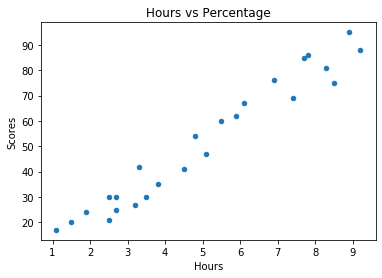

In [9]:
# plotting relationship between variables
df.plot.scatter("Hours","Scores")
plt.title('Hours vs Percentage') 

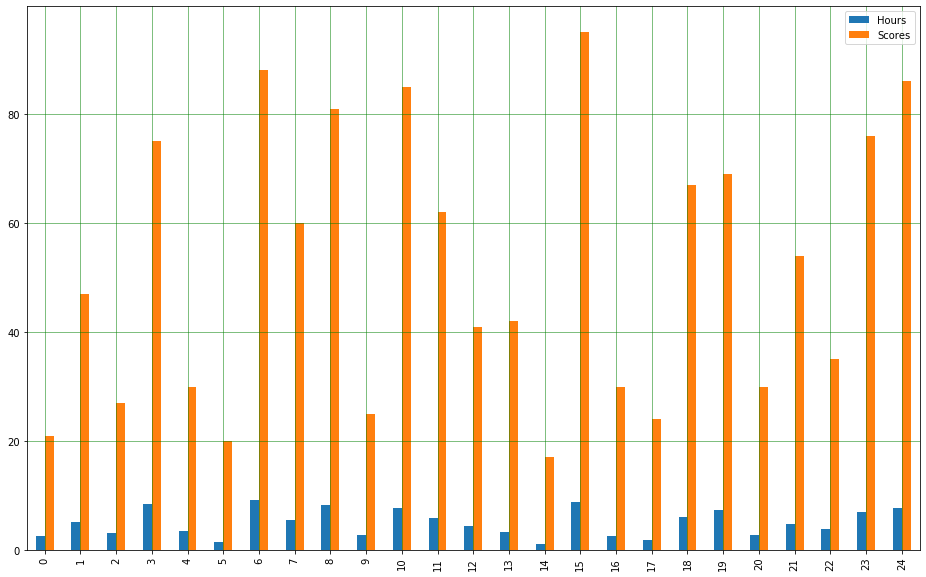

In [15]:
# We can also visualise the relation as a bar graph  :
df1 = df.head(25)
df1.plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

In [10]:
# to see the correlation between variables
df.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


# lets define  and divide the independent and dependent avr

In [18]:
x=df.iloc[:, :-1].values #independent var
y=df.iloc[:,1].values #dependent var


the next step is to split this data into training and test sets using sklearn

In [19]:
from sklearn.model_selection import train_test_split #it will devide the dataset into trainig and test
train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=0.2, random_state=0)

# Trainng the algorithm

In [23]:
from sklearn.linear_model import LinearRegression  
lg = LinearRegression()  
lg.fit(train_x, train_y) 


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [24]:
#To retrieve the intercept:
print(lg.intercept_)
#For retrieving the slope:
print(lg.coef_)

2.018160041434683
[9.91065648]


# Making Predition

In [25]:
# Now that we have trained our algorithm, it’s time to make some predictions
y_pred = lg.predict(test_x)

In [28]:
#Now compare the actual output values for X_test with the predicted values,
df = pd.DataFrame({'Actual': test_y.flatten(), 'Predicted': y_pred.flatten()})
df

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


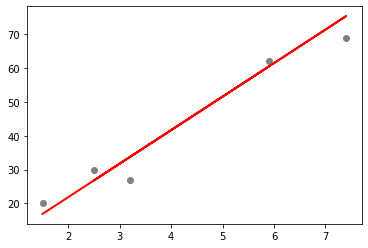

In [30]:
#Let's plot our straight line with the test data :
plt.scatter(test_x, test_y,  color='gray')
plt.plot(test_x, y_pred, color='red', linewidth=2)
plt.show()

#pred vs test data

The straight line in the above graph shows our algorithm is correct.

In [41]:
# camparing traing and test score
print('Training score: ',lg.score(train_x,train_y))
print('Testing score: ',lg.score(test_x,test_y))

Training score:  0.9515510725211553
Testing score:  0.9454906892105356


In [39]:
# its time to check for our data
hours = 9.25
hours=np.array(hours).reshape(-1,1)
own_pred = regressor.predict(hours)
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(own_pred[0]))

No of Hours = [[9.25]]
Predicted Score = 93.69173248737538


# Evaluating the model

In [37]:
# finding the scope of error
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(test_y, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(test_y, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(test_y, y_pred)))

Mean Absolute Error: 4.183859899002975
Mean Squared Error: 21.5987693072174
Root Mean Squared Error: 4.6474476121003665
